## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
df=pd.read_csv('Walmart Dataset.csv')
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


## Perform basic EDA On dataset

In [4]:
#drop null values
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [6]:
df.describe()



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [7]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

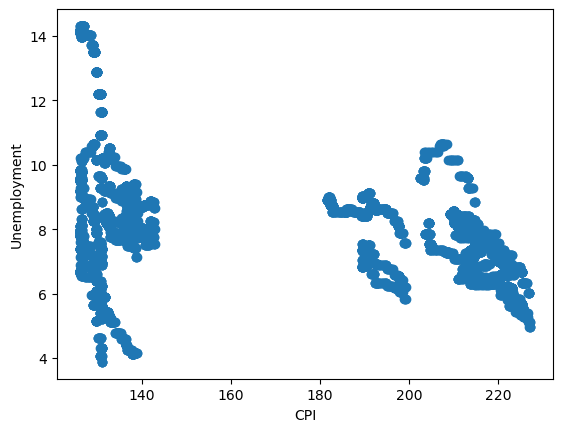

In [9]:
plt.scatter(df['CPI'],df['Unemployment'])
plt.xlabel('CPI')
plt.ylabel('Unemployment')
plt.show()

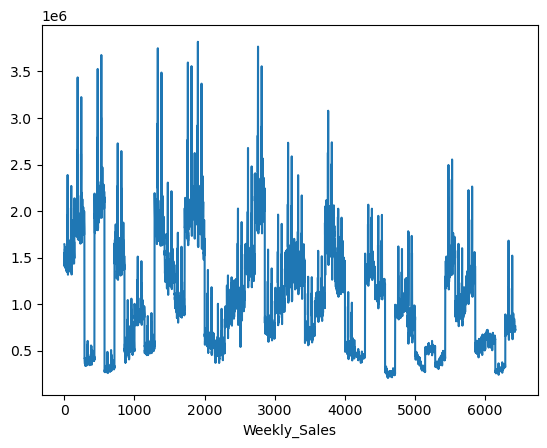

In [16]:
plt.plot(df['Weekly_Sales'])
plt.xlabel('Weekly_Sales')
plt.show()

## Feature Engineering

In [17]:
#engineer features such as dates,lags and rolling mean
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.isocalendar().week
df['dayofweek'] = df['Date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['quarter'] = df['Date'].dt.quarter
df['lag_1'] = df.groupby('Store')['Weekly_Sales'].shift(1)
df['lag_2'] = df.groupby('Store')['Weekly_Sales'].shift(2)
df['lag_3'] = df.groupby('Store')['Weekly_Sales'].shift(3)
df['rolling_mean_4'] = df.groupby('Store')['Weekly_Sales'].shift(1).rolling(4).mean().reset_index(level=0, drop=True)

In [18]:
#seperate the data of desired store
store_df=df[df['Store']==40].copy()

## Train Test Split

In [19]:
#split train and test data
train = store_df[store_df['Date'] < '2012-06-01']
test = store_df[store_df['Date'] >= '2012-06-01']

In [20]:
#seperate the x and y data
features = ['month', 'week', 'year', 'dayofweek', 'quarter',
            'Holiday_Flag', 'lag_1', 'lag_2', 'lag_3','rolling_mean_4']
x_train=train[features]
y_train=train['Weekly_Sales']
x_test=test[features]
y_test=test['Weekly_Sales']

## Use an Algo of RandomForestRegressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
modelRF=RandomForestRegressor()
modelRF.fit(x_train,y_train)


RandomForestRegressor()

In [23]:
y_predRF=modelRF.predict(x_test)

In [25]:
#root mean squared error to judge the performance of both models

from sklearn.metrics import mean_squared_error
rmseRF=np.sqrt(mean_squared_error(y_test,y_predRF))
print(rmseRF)


61270.490932555855


## Graphical Representation of Result

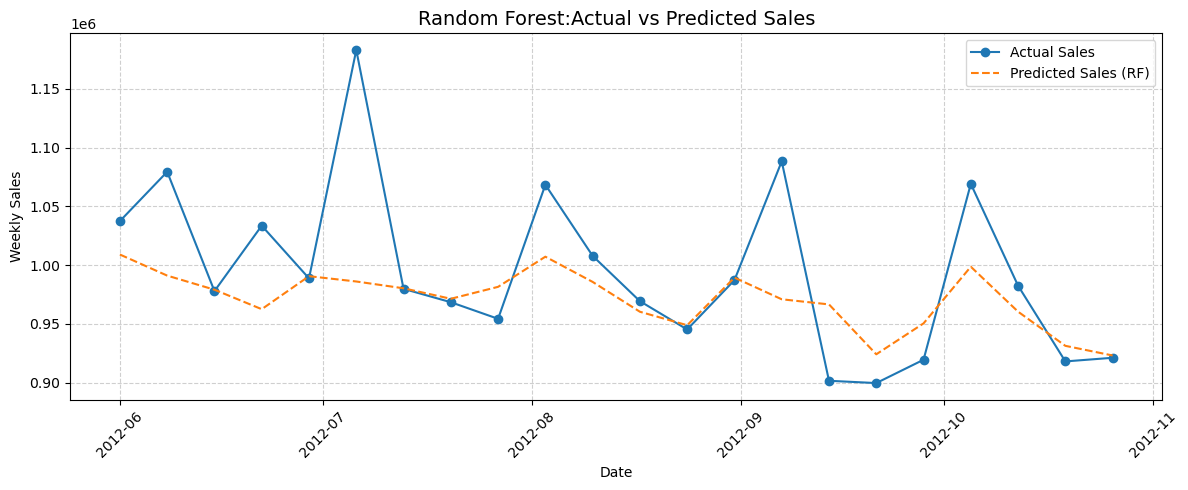

In [26]:
test_sorted = test.sort_values(by='Date')
dates = test_sorted['Date']
actual = y_test.loc[test_sorted.index]

# Store 1: Actual vs Predicted
plt.figure(figsize=(12,5))
plt.plot(dates, actual, label="Actual Sales", marker='o')
plt.plot(dates, y_predRF, label="Predicted Sales (RF)", linestyle='--')
plt.title("Random Forest:Actual vs Predicted Sales", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()